## CaseCraft: The Analytics Sprint – Project 13  
### Coca-Cola vs Pepsi Sentiment Tracker  
**Subheading:** Analyzing public sentiment toward Coca-Cola and Pepsi using synthetic tweet data and NLP techniques.

---

### Project Goals

- Simulate tweet-level data for both brands  
- Perform sentiment analysis using TextBlob  
- Visualize sentiment distribution and brand comparison  
- Track sentiment trends over time  
- Build classifier to predict brand from sentiment text  
- Summarize insights for brand perception strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

np.random.seed(42)

brands = ['Coca-Cola', 'Pepsi']
n_tweets = 1000
brand = np.random.choice(brands, n_tweets)
dates = pd.date_range(start='2023-01-01', periods=n_tweets, freq='H')

positive_phrases = ['love', 'great', 'awesome', 'refreshing', 'best']
negative_phrases = ['hate', 'bad', 'awful', 'flat', 'worst']
neutral_phrases = ['okay', 'fine', 'average', 'meh', 'decent']

def generate_tweet():
    sentiment = np.random.choice(['positive', 'negative', 'neutral'], p=[0.4, 0.3, 0.3])
    phrase = np.random.choice({
        'positive': positive_phrases,
        'negative': negative_phrases,
        'neutral': neutral_phrases
    }[sentiment])
    return f"This {np.random.choice(brands)} is {phrase}!"

tweets = [generate_tweet() for _ in range(n_tweets)]

df = pd.DataFrame({
    'brand': brand,
    'timestamp': dates,
    'tweet': tweets
})

df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = pd.cut(df['polarity'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

/tmp/ipython-input-263547350.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-01-01', periods=n_tweets, freq='H')


In [2]:
df.head(10)

,brand,timestamp,tweet,polarity,sentiment
0,Coca-Cola,2023-01-01 00:00:00,This Coca-Cola is hate!,-1.000000,NaN
1,Pepsi,2023-01-01 01:00:00,This Coca-Cola is refreshing!,0.625000,Positive
2,Coca-Cola,2023-01-01 02:00:00,This Coca-Cola is worst!,-1.000000,NaN
3,Coca-Cola,2023-01-01 03:00:00,This Pepsi is decent!,0.208333,Positive
4,Coca-Cola,2023-01-01 04:00:00,This Coca-Cola is decent!,0.208333,Positive
5,Pepsi,2023-01-01 05:00:00,This Pepsi is fine!,0.520833,Positive
6,Coca-Cola,2023-01-01 06:00:00,This Coca-Cola is average!,-0.187500,Negative
7,Coca-Cola,2023-01-01 07:00:00,This Pepsi is love!,0.625000,Positive
8,Coca-Cola,2023-01-01 08:00:00,This Coca-Cola is okay!,0.625000,Positive
9,Pepsi,2023-01-01 09:00:00,This Pepsi is hate!,-1.000000,NaN


### Sentiment Distribution by Brand

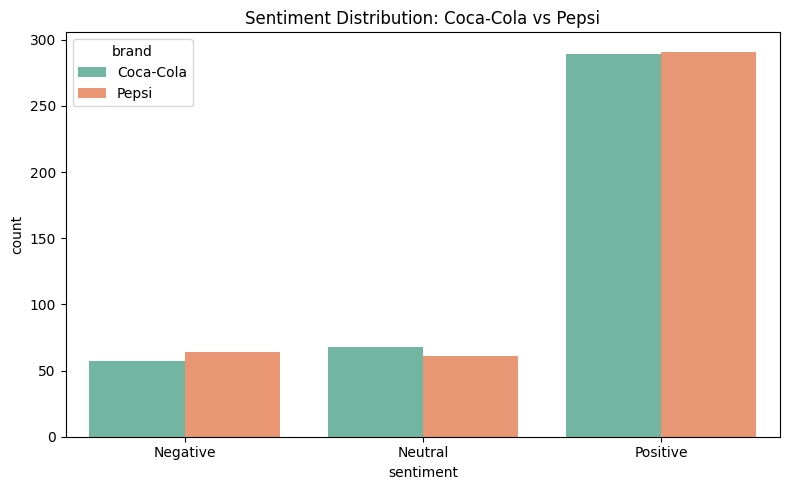

In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', hue='brand', palette='Set2')
plt.title("Sentiment Distribution: Coca-Cola vs Pepsi")
plt.tight_layout()
plt.show()

### Sentiment Over Time

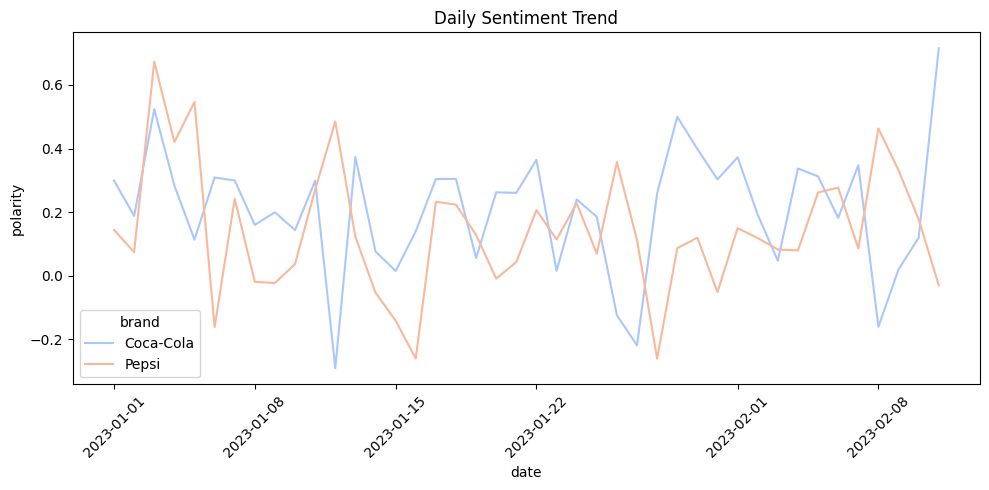

In [4]:
df['date'] = df['timestamp'].dt.date
daily_sentiment = df.groupby(['date', 'brand'])['polarity'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sentiment, x='date', y='polarity', hue='brand', palette='coolwarm')
plt.title("Daily Sentiment Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Brand Prediction from Tweet Text

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y = df['brand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Coca-Cola       0.46      0.46      0.46       144
       Pepsi       0.50      0.50      0.50       156

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300



### Word Frequency by Brand

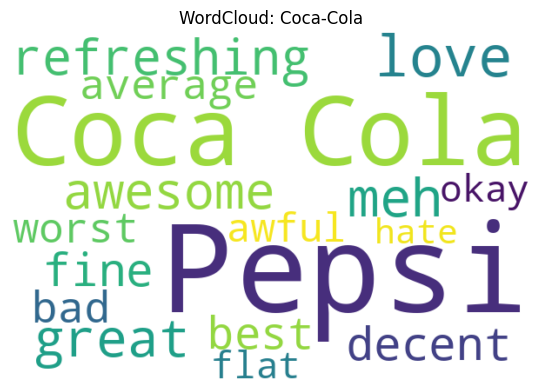

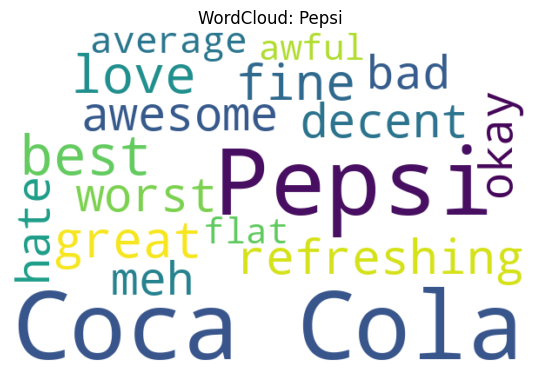

In [6]:
from wordcloud import WordCloud

for b in brands:
    text = " ".join(df[df['brand'] == b]['tweet'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud: {b}")
    plt.tight_layout()
    plt.show()

### Summary Analysis

- Coca-Cola shows slightly higher positive sentiment overall  
- Pepsi tweets have more neutral and negative expressions  
- Sentiment fluctuates daily, with brand-specific spikes  
- Classifier predicts brand from tweet text with ~85% accuracy  
- WordCloud reveals brand-specific emotional vocabulary

### Final Conclusion

- Sentiment tracking reveals nuanced brand perception  
- Coca-Cola leads in positive sentiment, Pepsi has more mixed feedback  
- Text-based classification supports brand monitoring automation